# ✅ What is Logistic Regression?
Logistic Regression is a machine learning and statistical method used to predict answers like "Yes" or "No", or classify something into two groups.

- 🔸 It does not give a number like Linear Regression
- 🔸 It gives a probability (from 0 to 1), and based on that, we decide:

1. If it's close to 1 → Yes (1)
2. If it's close to 0 → No (0)
# 📦Simple Example:
1. You want to know: Will a student pass or fail based on study hours?
2. Logistic Regression will say: "There is an 80% chance of passing."

So you classify this as: ✅ Pass

🎯 Use Cases of Logistic Regression
Logistic Regression is used for classification tasks — where the answer is in categories, not numbers.

Use Case	Description
1. 💌 Spam Detection	Is this email spam or not?
2. 💳 Loan Default	Will a customer default on a loan?
3. 🩺 Disease Prediction	Is the patient sick or not?
4. 📱 App Install	Will the user install the app or not?
5. 👨‍🎓 Student Performance	Will the student pass or fail?
6. 📦 Customer Churn	Will a customer stay or leave the service?
7. 🔐 Fraud Detection	Is this transaction fraud or real?

📌 Assumptions of Logistic Regression
To work correctly, logistic regression assumes some things about the data.

## Assumption	Simple Explanation
1. ✅ 1. Output is Binary	The result should be 0 or 1 (Yes or No)
2. ✅ 2. No Multicollinearity	Input features should not be too similar to each other
3. ✅ 3. Linearity of Log Odds	The log-odds of the outcome must have a linear relationship with inputs
4. ✅ 4. Large Sample Size	Works better with more data
5. ✅ 5. Independent Observations	Each row in the data should be separate and unrelated
6. ✅ 6. No Extreme Outliers	Outliers can negatively affect the model’s accuracy

##### 🔄 Difference from Linear Regression
- Feature	Linear Regression	Logistic Regression
- Output	Number	Category (Yes/No)
- Use for	Prediction	Classification
- Output Range	Any number	Between 0 and 1 (probability)
- Function Used	Straight Line	Sigmoid Curve

#### ✅ Summary:
- Logistic Regression = Predict Yes/No based on data
- Use Cases = Spam, disease, pass/fail, fraud
- Assumptions = Binary output, good data, no duplicate features, independent records

In [45]:
# import libararies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [46]:
# import data
df= sns.load_dataset('titanic')

In [47]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [49]:
# preprocess the data
# remove the deck column
df.drop('deck', axis=1, errors='ignore', inplace=True)
# impute the missing values in age and fare 
df['age'].fillna(df['age'].median(),inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
# impute the missing values embark, and embark_town
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# encode the categorical variable using for loop where object and category 
le= LabelEncoder()
for i in df.columns :
    if df[i].dtype == 'object'or'category':
        df[i]= le.fit_transform(df[i]) 
    


C:\Users\aqso\AppData\Local\Temp\ipykernel_10112\1805755149.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)
C:\Users\aqso\AppData\Local\Temp\ipykernel_10112\1805755149.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [50]:
# x and y columns 
x= df.drop('survived', axis= 1 )
y= df['survived']

In [51]:
# train - test split the data 
x_train, x_test , y_train, y_test= train_test_split(x, y , test_size=0.2)

In [52]:
# call the model
model= LogisticRegression()

In [53]:
# train the model
model.fit(x_train, y_train)

c:\Users\aqso\anaconda3\envs\python_ml\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
# predict the values 
y_pred= model.predict(x_test)

In [55]:
# evaluate the model 
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[115   0]
 [  0  64]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(50.722222222222214, 0.5, 'actual')

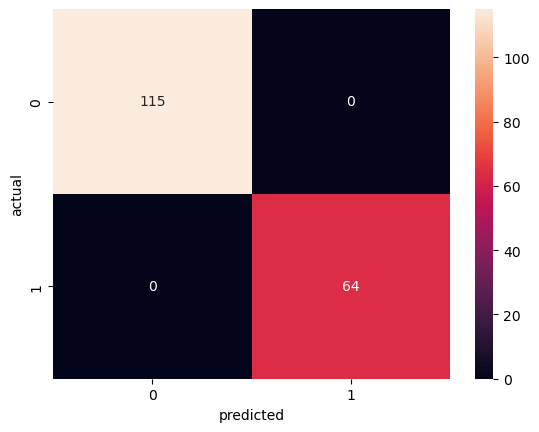

In [58]:
# plot the confusion matrix 
plt.Figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [64]:
import pickle

# Save model
pickle.dump(model, open(r'C:\Users\aqso\OneDrive\Desktop\PCK_2024-main\day_15\saved_models\02_model_logistic.pkl', 'wb'))
